In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import glob
from IPython.display import Image
import json
import numpy as np

In [ ]:
#/home/vashloc/miniconda3/lib/python3.7/site-packages/cv2/data

In [2]:
cv2.__version__

'4.2.0'

In [3]:
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_alt2.xml')
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_alt.xml')

In [6]:
img_folder = 'imgs/'
img_list = [i.split('/')[-1] for i in glob.glob('imgs/*.jpg')]
img2id = {'frame_2610.jpg':1, 'frame_2900.jpg': 2}
labels_path = 'labels/'
name_list = [f.split('.')[0].split('/')[-1] for f in glob.glob(img_folder+'*.jpg')]

## twentysixthRelease

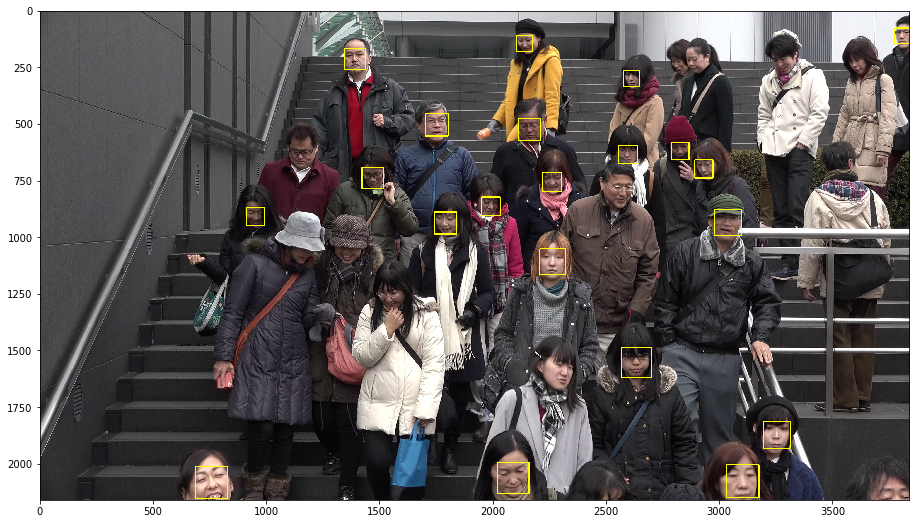

In [11]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'twentysixthRelease.xml')
img = cv2.imread('faces.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray)
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h),(0,255,255),3)
plt.figure(figsize=(16,9))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## Decision form opencv

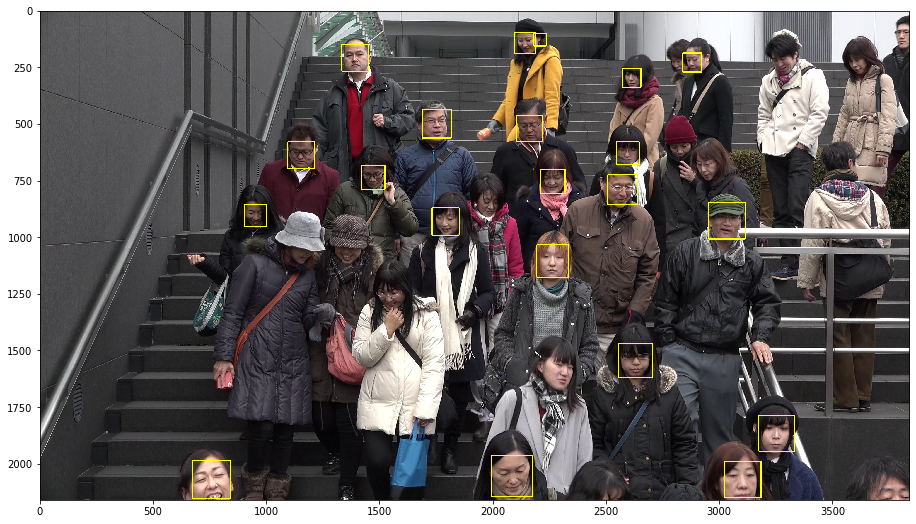

In [52]:
face_cascade_default = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_alt.xml')
img = cv2.imread('faces.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces,levels, weights  = face_cascade_default.detectMultiScale3(gray,outputRejectLevels=True)
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h),(0,255,255),3)
plt.figure(figsize=(16,9))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [78]:
face_cascade_default = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_alt.xml')

In [7]:
def to_coco(image_id,face_id,x,y,w,h):
    
    category_id = 1
    area = w*h
    
    res = {'id': int(face_id),
           'image_id': int(image_id),
           'category_id': int(category_id),
           'area': float(area),
           'bbox': [int(x), int(y), int(w), int(h)],
           'iscrowd': False,
           'isbbox': True,
           'color': '#e3a947',
           'score': 1}
    
    return res

In [41]:
#Create predictions for haar cascade default aproach

pred = []
for i in img_list:
    image_id = img2id[i]
    img = cv2.imread(f'{img_folder}{i}')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade_default.detectMultiScale(gray)
    if len(faces):
        for face_id,(x,y,w,h) in enumerate(faces):
            pred.append(to_coco(image_id,face_id,x,y,w,h))

In [42]:
pred

[{'id': 0,
  'image_id': 1,
  'category_id': 1,
  'area': 3025.0,
  'bbox': [2179, 103, 55, 55],
  'iscrowd': False,
  'isbbox': True,
  'color': '#e3a947',
  'score': 1},
 {'id': 1,
  'image_id': 1,
  'category_id': 1,
  'area': 8649.0,
  'bbox': [2095, 97, 93, 93],
  'iscrowd': False,
  'isbbox': True,
  'color': '#e3a947',
  'score': 1},
 {'id': 2,
  'image_id': 1,
  'category_id': 1,
  'area': 13924.0,
  'bbox': [1331, 151, 118, 118],
  'iscrowd': False,
  'isbbox': True,
  'color': '#e3a947',
  'score': 1},
 {'id': 3,
  'image_id': 1,
  'category_id': 1,
  'area': 6889.0,
  'bbox': [2569, 257, 83, 83],
  'iscrowd': False,
  'isbbox': True,
  'color': '#e3a947',
  'score': 1},
 {'id': 4,
  'image_id': 1,
  'category_id': 1,
  'area': 7056.0,
  'bbox': [2836, 189, 84, 84],
  'iscrowd': False,
  'isbbox': True,
  'color': '#e3a947',
  'score': 1},
 {'id': 5,
  'image_id': 1,
  'category_id': 1,
  'area': 16129.0,
  'bbox': [1688, 437, 127, 127],
  'iscrowd': False,
  'isbbox': True,


In [44]:
with open('haar_default.json', 'w') as f:
    json.dump(pred, f)

In [92]:
(score-np.mean(score))/np.std(score)

array([[-0.3529462 ],
       [ 2.06736313],
       [ 0.04657489],
       [ 0.87682539],
       [ 1.19287508],
       [-0.57041358],
       [-0.46378427],
       [-1.4070117 ],
       [ 0.79216844],
       [-0.06325934],
       [ 0.34188443],
       [-0.99302095],
       [-1.46725531]])

In [97]:
score/np.max(score)

array([[0.98080053],
       [1.        ],
       [0.98396979],
       [0.99055588],
       [0.99306299],
       [0.97907544],
       [0.97992129],
       [0.972439  ],
       [0.98988433],
       [0.98309852],
       [0.98631238],
       [0.97572305],
       [0.97196111]])

In [99]:
#Create predictions(txt format) for haar cascade default + score, for evaluating

pred = []
for i in img_list:
    image_id = img2id[i]
    img = cv2.imread(f'{img_folder}{i}')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces, _, score  = face_cascade_default.detectMultiScale3(gray, outputRejectLevels=True)
    score = score/np.max(score)
    if len(faces):
        for face_id,(x,y,w,h) in enumerate(faces):
            pred.append([image_id,face_id,score[face_id][0],x,y,w,h])
pred

[[1, 0, 0.9706910889896246, 2179, 103, 55, 55],
 [1, 1, 0.9794893206649553, 2095, 97, 93, 93],
 [1, 2, 0.993124084465439, 1331, 151, 118, 118],
 [1, 3, 0.979318681174548, 2569, 257, 83, 83],
 [1, 4, 0.9701228076710967, 2836, 189, 84, 84],
 [1, 5, 0.9977182413379966, 1688, 437, 127, 127],
 [1, 6, 0.9822879719212066, 2103, 465, 113, 113],
 [1, 7, 0.9845575534064785, 1093, 581, 119, 119],
 [1, 8, 0.9831812244096034, 2543, 581, 101, 101],
 [1, 9, 0.9857856536453475, 1418, 685, 104, 104],
 [1, 10, 1.0, 2209, 701, 108, 108],
 [1, 11, 0.9750252820153731, 2506, 726, 131, 131],
 [1, 12, 0.984073397589296, 1730, 872, 120, 120],
 [1, 13, 0.9858267046962301, 903, 856, 98, 98],
 [1, 14, 0.9838396165114219, 2951, 848, 161, 161],
 [1, 15, 0.9863378778467832, 2192, 1035, 142, 142],
 [1, 16, 0.9736872248021409, 2552, 1468, 151, 151],
 [1, 17, 0.9837923205603644, 3172, 1786, 158, 158],
 [1, 18, 0.9832166425562011, 1993, 1964, 181, 181],
 [1, 19, 0.9857135352167058, 3021, 1989, 161, 161],
 [1, 20, 0.9769

In [104]:
#Create files of predictions(txt format) for haar cascade default + score, for evaluating
pred = []
class_name = '0'
for i in name_list:
    img = cv2.imread(f'{img_folder}{i}.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces, _, score  = face_cascade_default.detectMultiScale3(gray, outputRejectLevels=True)
    score = score/np.max(score)
    if len(faces):
        with open(f'detections/{i}.txt', 'w+') as detection:
            for face_id,(x,y,w,h) in enumerate(faces):
                row = ' '.join([class_name,str(score[face_id][0]),str(x),str(y),str(w),str(h)])
                detection.write(row + '\n')

In [101]:
name_list

['frame_2610', 'frame_2900']

In [ ]:
# python pascalvoc.py --gtfolder /home/vasylcf/app/face_detection/labels --detfolder /home/vasylcf/app/face_detection/detections -gtformat xywh -detformat xywh -gtcoords rel -detcoords abs -imgsize 3840,2160 --savepath my_results

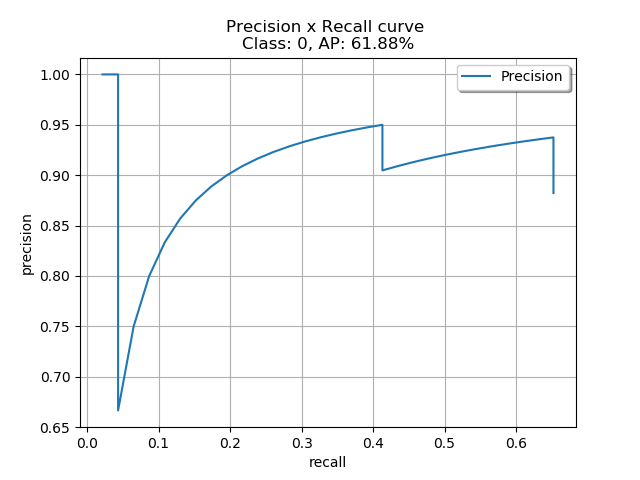

In [105]:
Image('/home/vasylcf/app/Object-Detection-Metrics/my_results/0.png')

## COCO eval
- Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.652

## Let's try explain this result: AveragePrecision 61.88 %

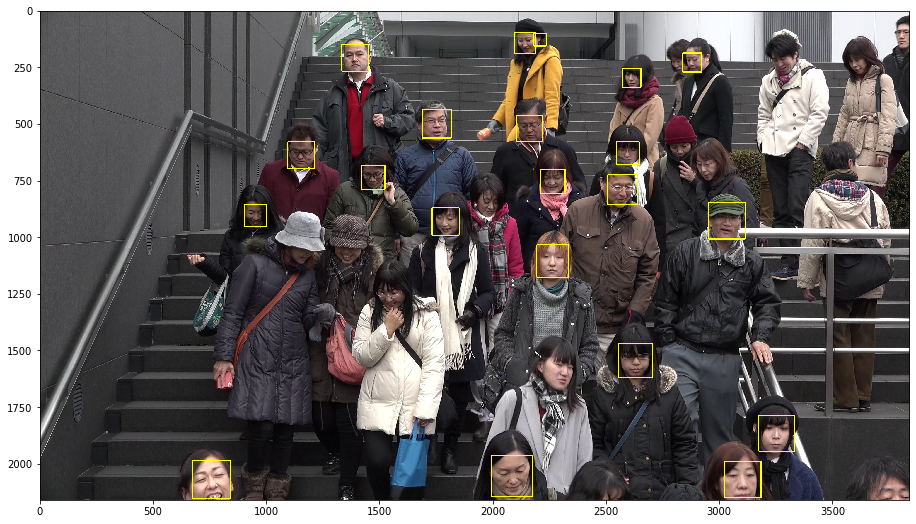

In [106]:
face_cascade_default = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_alt.xml')
img = cv2.imread('faces.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces,levels, weights  = face_cascade_default.detectMultiScale3(gray,outputRejectLevels=True)
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h),(0,255,255),3)
plt.figure(figsize=(16,9))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [14]:
def coordinates(img,x_center, y_center, x_width, y_height):
    
    x_center = x_center*img.shape[1]
    y_center = y_center*img.shape[0]
    x_width = (x_width*img.shape[1])/2
    y_height = (y_height*img.shape[0])/2
    
    x0 = int(x_center-x_width)
    y0 = int(y_center - y_height)
    
    x1 = int(x_center+x_width)
    y1 = int(y_center + y_height)
    
    return (x0,y0),(x1,y1)  

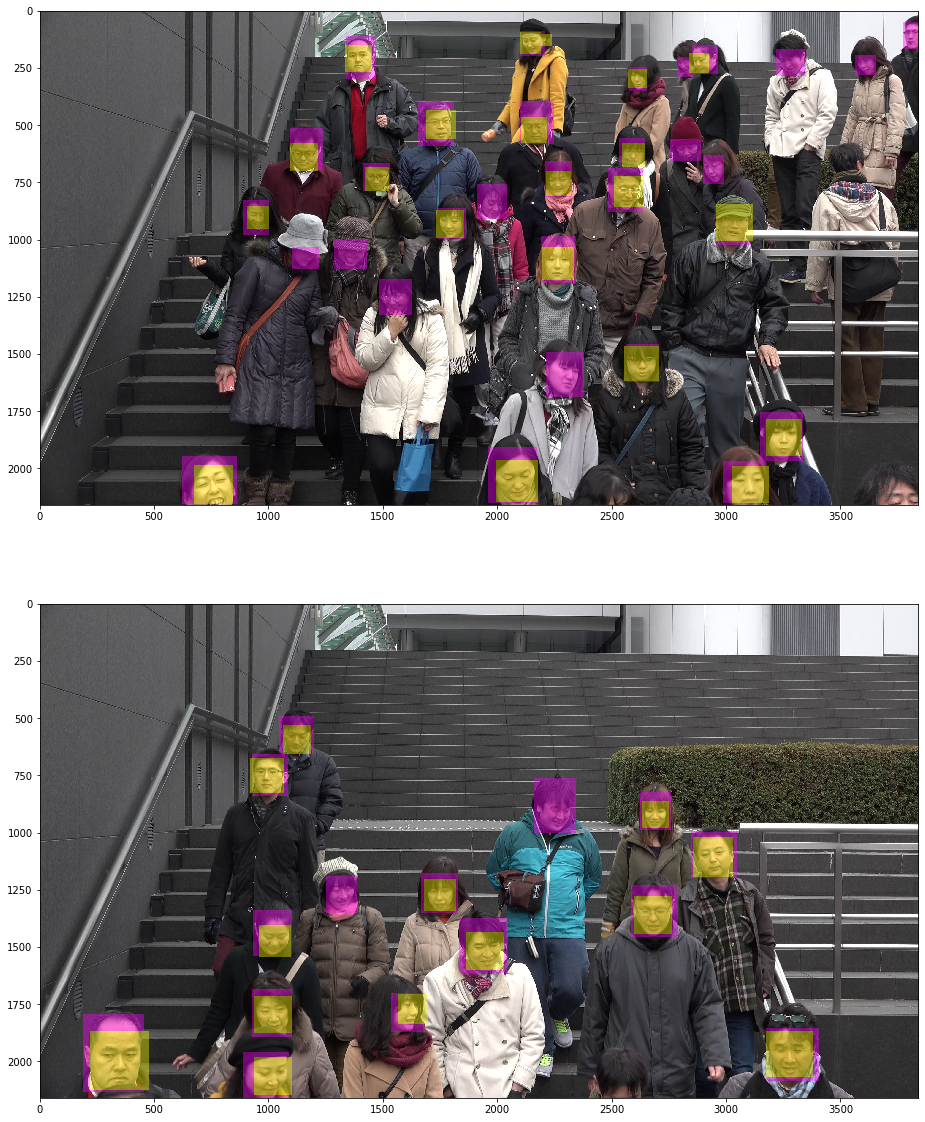

In [20]:
face_cascade_default = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_alt.xml')

plt.figure(figsize=(20,20))
idx = 1
alpha = 0.4

for img_name in name_list:
    img = cv2.imread(f'{img_folder}{img_name}.jpg')
    img_raw = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    gt = pd.read_csv(f'{labels_path}{img_name}.txt',sep=' ',header=None)
    gt.columns = ['class_index', 'x_center', 'y_center', 'x_width', 'y_height']
    gt['coordinates']=gt[['x_center', 'y_center', 'x_width', 'y_height']].apply(lambda x: coordinates(img,*x),axis=1)
    
    for x in gt.coordinates:
        a,b = x
        cv2.rectangle(img,a,b,(255,0,255),-1)
    
    faces,levels, weights  = face_cascade_default.detectMultiScale3(gray,outputRejectLevels=True)
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h),(0,255,255),-1)
    img_alpha = cv2.addWeighted(img, alpha, img_raw, 1-alpha, 0)
    plt.subplot(len(name_list), 1, idx)
    plt.imshow(cv2.cvtColor(img_alpha,cv2.COLOR_BGR2RGB))
    idx += 1
    

## Let's will save image every 10 seconds

In [14]:
cap = cv2.VideoCapture('video_4K.mp4')
fps = int(cap.get(cv2.CAP_PROP_FPS))
fps

29

In [13]:
ls

annotations/               faces.jpg  iou.png  README.md
face_detection_haar.ipynb  imgs/      labels/  samples_3_sec/


In [36]:
cap = cv2.VideoCapture('video_4K.mp4')
fps = int(cap.get(cv2.CAP_PROP_FPS))
success = True
count = 0
n = 3 # every 10 seconds
while success:
    
    success, img = cap.read()
    if count%(n*fps)==0:
        cv2.imwrite(f'samples_3_sec/frame_{count}.jpg',img)
        print('file was saved successfully')
    
    # Convert to grayscale
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     # Detect the faces
#     faces = face_cascade.detectMultiScale(gray, 1.1, 4)
#     # Draw the rectangle around each face
#     for (x, y, w, h) in faces:
#         cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
#     # Display
#     cv2.imshow('img', img)
    # Stop if escape key is pressed
#     k = cv2.waitKey(30) & 0xff
#     if k==27:
#         break
    count += 1
# Release the VideoCapture object
cap.release()
cv2.destroyAllWindows()

file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved successfully
file was saved succe

## Detect faces on video

In [38]:
cap = cv2.VideoCapture('video_4K.mp4')
while True:
    _, img = cap.read()
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    # Display
    cv2.imshow('img', img)
    # Stop if escape key is pressed
    k = cv2.waitKey(30) & 0xff
    if k==27:
        break
# Release the VideoCapture object
cap.release()

error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


## Labels interpritatiom

In [ ]:
# https://github.com/Cartucho/OpenLabeling#run-project

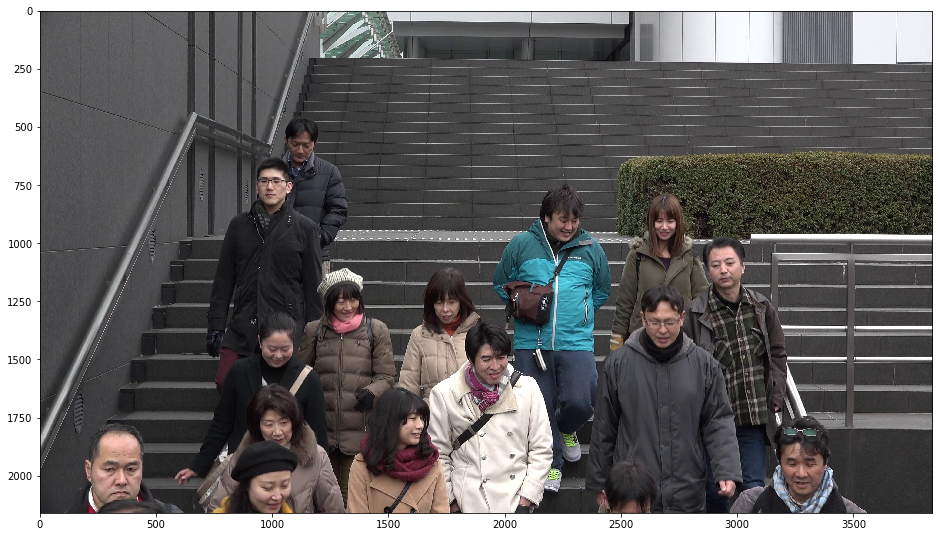

In [15]:
img = cv2.imread('imgs/frame_2900.jpg')
plt.figure(figsize=(16,10))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [16]:
with open('labels/frame_2900.txt', 'r') as f:
    content = f.read()
content

'0 0.2916666666666667 0.2650462962962963 0.03958333333333333 0.07546296296296297\n0 0.2615885416666667 0.3474537037037037 0.040364583333333336 0.0837962962962963\n0 0.585546875 0.40902777777777777 0.047135416666666666 0.10972222222222222\n0 0.7001302083333333 0.4199074074074074 0.03567708333333333 0.07685185185185185\n0 0.76640625 0.5085648148148149 0.05260416666666667 0.09212962962962963\n0 0.6990885416666667 0.6215277777777778 0.053385416666666664 0.10416666666666667\n0 0.8563802083333333 0.9125 0.06015625 0.10648148148148148\n0 0.5048177083333333 0.6912037037037037 0.054947916666666666 0.1111111111111111\n0 0.45416666666666666 0.5856481481481481 0.041666666666666664 0.08148148148148149\n0 0.34296875 0.5884259259259259 0.0359375 0.07314814814814814\n0 0.26484375 0.6668981481481482 0.044270833333333336 0.09212962962962963\n0 0.417578125 0.8273148148148148 0.03723958333333333 0.07962962962962963\n0 0.2638020833333333 0.8273148148148148 0.04635416666666667 0.0962962962962963\n0 0.257291

In [17]:
F = pd.read_csv('labels/frame_2900.txt',sep=' ',header=None)

In [18]:
F.columns = ['class_index', 'x_center', 'y_center', 'x_width', 'y_height']

In [19]:
img.shape

(2160, 3840, 3)

In [20]:
height, width = img.shape[:2]

In [21]:
F

class_index  x_center  y_center   x_width  y_height
0             0  0.291667  0.265046  0.039583  0.075463
1             0  0.261589  0.347454  0.040365  0.083796
2             0  0.585547  0.409028  0.047135  0.109722
3             0  0.700130  0.419907  0.035677  0.076852
4             0  0.766406  0.508565  0.052604  0.092130
5             0  0.699089  0.621528  0.053385  0.104167
6             0  0.856380  0.912500  0.060156  0.106481
7             0  0.504818  0.691204  0.054948  0.111111
8             0  0.454167  0.585648  0.041667  0.081481
9             0  0.342969  0.588426  0.035937  0.073148
10            0  0.264844  0.666898  0.044271  0.092130
11            0  0.417578  0.827315  0.037240  0.079630
12            0  0.263802  0.827315  0.046354  0.096296
13            0  0.257292  0.953241  0.051562  0.090741
14            0  0.083724  0.909028  0.068490  0.156944

In [43]:
def coordinates(img,x_center, y_center, x_width, y_height):
    
    x_center = x_center*img.shape[1]
    y_center = y_center*img.shape[0]
    x_width = (x_width*img.shape[1])/2
    y_height = (y_height*img.shape[0])/2
    
    x0 = int(x_center-x_width)
    y0 = int(y_center - y_height)
    
    x1 = int(x_center+x_width)
    y1 = int(y_center + y_height)
    
    return (x0,y0),(x1,y1)        

In [23]:
F['coordinates']=F[['x_center', 'y_center', 'x_width', 'y_height']].apply(lambda x: coordinates(img,*x),axis=1)

In [24]:
F

class_index  x_center  y_center   x_width  y_height  \
0             0  0.291667  0.265046  0.039583  0.075463   
1             0  0.261589  0.347454  0.040365  0.083796   
2             0  0.585547  0.409028  0.047135  0.109722   
3             0  0.700130  0.419907  0.035677  0.076852   
4             0  0.766406  0.508565  0.052604  0.092130   
5             0  0.699089  0.621528  0.053385  0.104167   
6             0  0.856380  0.912500  0.060156  0.106481   
7             0  0.504818  0.691204  0.054948  0.111111   
8             0  0.454167  0.585648  0.041667  0.081481   
9             0  0.342969  0.588426  0.035937  0.073148   
10            0  0.264844  0.666898  0.044271  0.092130   
11            0  0.417578  0.827315  0.037240  0.079630   
12            0  0.263802  0.827315  0.046354  0.096296   
13            0  0.257292  0.953241  0.051562  0.090741   
14            0  0.083724  0.909028  0.068490  0.156944   

                     coordinates  
0     ((1044, 491), (1196, 654))  
1      ((927, 660), (1082, 841))  
2    ((2158, 765), (2339, 1002))  
3     ((2620, 824), (2757, 990))  
4    ((2842, 999), (3044, 1198))  
5   ((2582, 1230), (2787, 1455))  
6   ((3173, 1856), (3404, 2086))  
7   ((1832, 1373), (2043, 1613))  
8   ((1663, 1177), (1823, 1353))  
9   ((1248, 1192), (1386, 1350))  
10   ((932, 1341), (1102, 1540))  
11  ((1532, 1701), (1675, 1873))  
12   ((924, 1683), (1102, 1891))  
13   ((888, 1961), (1087, 2157))  
14    ((189, 1794), (452, 2133))

In [25]:
for x in F.coordinates:
    a,b = x
    print(a)
    
    print(b)
    cv2.rectangle(img,a,b,(0,255,255),6)

(1044, 491)
(1196, 654)
(927, 660)
(1082, 841)
(2158, 765)
(2339, 1002)
(2620, 824)
(2757, 990)
(2842, 999)
(3044, 1198)
(2582, 1230)
(2787, 1455)
(3173, 1856)
(3404, 2086)
(1832, 1373)
(2043, 1613)
(1663, 1177)
(1823, 1353)
(1248, 1192)
(1386, 1350)
(932, 1341)
(1102, 1540)
(1532, 1701)
(1675, 1873)
(924, 1683)
(1102, 1891)
(888, 1961)
(1087, 2157)
(189, 1794)
(452, 2133)


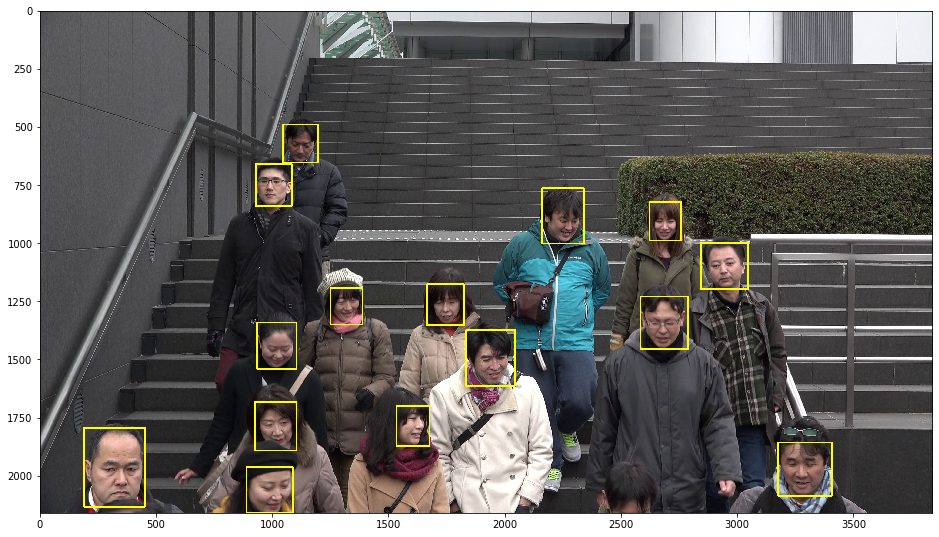

In [26]:
plt.figure(figsize=(16,10))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## Google cloud

In [1]:

from google.protobuf.json_format import MessageToJson
 
import io
import os
import json
 
 
# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types
 
# Instantiates a client
client = vision.ImageAnnotatorClient()
 
# The name of the image file to annotate
file_name = os.path.abspath('faces.png')
 
# Loads the image into memory
with io.open(file_name, 'rb') as image_file:
    content = image_file.read()
 
image = types.Image(content=content)
 
 
# Performs label detection on the image file
#response = client.text_detection(image=image)

# data = json.loads(MessageToJson(response))
# data

In [8]:
response = client.face_detection(image=image, max_results=50)
data = json.loads(MessageToJson(response))
data

{'faceAnnotations': [{'boundingPoly': {'vertices': [{'x': 2828, 'y': 1722},
     {'x': 3073, 'y': 1722},
     {'x': 3073, 'y': 2007},
     {'x': 2828, 'y': 2007}]},
   'fdBoundingPoly': {'vertices': [{'x': 2857, 'y': 1777},
     {'x': 3049, 'y': 1777},
     {'x': 3049, 'y': 1970},
     {'x': 2857, 'y': 1970}]},
   'landmarks': [{'type': 'LEFT_EYE',
     'position': {'x': 2921.43701171875,
      'y': 1844.014404296875,
      'z': -0.0013647677842527628}},
    {'type': 'RIGHT_EYE',
     'position': {'x': 2995.94873046875,
      'y': 1849.599609375,
      'z': 6.620723724365234}},
    {'type': 'LEFT_OF_LEFT_EYEBROW',
     'position': {'x': 2896.911376953125,
      'y': 1821.878173828125,
      'z': 6.915945529937744}},
    {'type': 'RIGHT_OF_LEFT_EYEBROW',
     'position': {'x': 2943.245361328125,
      'y': 1823.7718505859375,
      'z': -10.811958312988281}},
    {'type': 'LEFT_OF_RIGHT_EYEBROW',
     'position': {'x': 2979.54638671875,
      'y': 1827.2127685546875,
      'z': -7.59110

In [41]:
ls imgs

frame_2610.jpg  frame_2900.jpg


## Quality measurement

I will work with two images: "frame_2610.jpg  frame_2900.jpg"

In [80]:
imgs_path = 'imgs/'
labels_path = 'labels/'

name_list = [f.split('.')[0].split('/')[-1] for f in glob.glob(imgs_path+'*.jpg')]
name_list

['frame_2610', 'frame_2900']

In [49]:
from shapely.geometry import Polygon

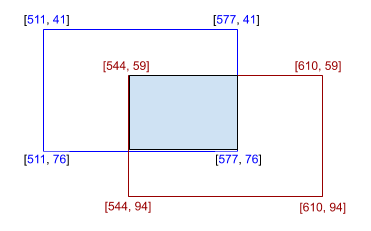

In [52]:
## IOU realization
Image('iou.png')

In [56]:
def calc_iou(box_1, box_2):
    poly_1 = Polygon(box_1)
    poly_2 = Polygon(box_2)
    iou = poly_1.intersection(poly_2).area / poly_1.union(poly_2).area
    return iou

box_1 = [[511, 41], [577, 41], [577, 76], [511, 76]]
box_2 = [[544, 59], [610, 59], [610, 94], [544, 94]]

calc_iou(box_1, box_2)

0.13821138211382114

## Read data from txt labels

In [61]:
# read data from txt labels
F = pd.DataFrame(columns = ['img_name','class_index', 'x_center', 'y_center', 'x_width', 'y_height'] )

for img_name in name_list:
    FF = pd.read_csv('labels/frame_2900.txt',sep=' ',header=None)
    FF.columns = ['class_index', 'x_center', 'y_center', 'x_width', 'y_height']
    FF['img_name']=img_name
    F=pd.concat((F,FF),ignore_index=True)

In [63]:
F.head()

img_name class_index  x_center  y_center   x_width  y_height
0  frame_2900           0  0.291667  0.265046  0.039583  0.075463
1  frame_2900           0  0.261589  0.347454  0.040365  0.083796
2  frame_2900           0  0.585547  0.409028  0.047135  0.109722
3  frame_2900           0  0.700130  0.419907  0.035677  0.076852
4  frame_2900           0  0.766406  0.508565  0.052604  0.092130

In [82]:
# face_cascade_default
f_haar_default = pd.DataFrame(columns = ['img_name','class_index', 'x', 'y', 'x_width', 'y_height'] )

for img_name in name_list:
    img = cv2.imread(f'{imgs_path}{img_name}.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade_default.detectMultiScale(gray)
    for x,y,w,h in faces:
        f_haar_default=f_haar_default.append({k:v for k,v in zip(f_haar_default.columns,[img_name,0,x,y,w,h])},ignore_index=True)

In [83]:
f_haar_default

img_name class_index     x     y x_width y_height
0   frame_2900           0  1061   534     122      122
1   frame_2900           0   918   678     148      148
2   frame_2900           0  2632   866     113      113
3   frame_2900           0  2854  1021     173      173
4   frame_2900           0  1677  1204     140      140
5   frame_2900           0  2596  1277     166      166
6   frame_2900           0  1861  1435     166      166
7   frame_2900           0   956  1405     138      138
8   frame_2900           0   220  1869     253      253
9   frame_2900           0  1564  1708     129      129
10  frame_2900           0   936  1714     162      162
11  frame_2900           0  3172  1867     202      202
12  frame_2900           0   934  1980     167      167
13  frame_2610           0  2179   103      55       55
14  frame_2610           0  2095    97      93       93
15  frame_2610           0  1331   151     118      118
16  frame_2610           0  2569   257      83       83
17  frame_2610           0  2836   189      84       84
18  frame_2610           0  1688   437     127      127
19  frame_2610           0  2103   465     113      113
20  frame_2610           0  2543   581     101      101
21  frame_2610           0  1093   581     119      119
22  frame_2610           0  1418   685     104      104
23  frame_2610           0  2209   701     108      108
24  frame_2610           0  2506   726     131      131
25  frame_2610           0   903   856      98       98
26  frame_2610           0  1730   872     120      120
27  frame_2610           0  2951   848     161      161
28  frame_2610           0  2192  1035     142      142
29  frame_2610           0  2552  1468     151      151
30  frame_2610           0  3172  1786     158      158
31  frame_2610           0  1993  1964     181      181
32  frame_2610           0  3021  1989     161      161
33  frame_2610           0   672  1985     168      168

##  Convert txt labels into format  'class_name' 'left' 'top' 'right' 'bottom'

In [74]:
def converter_txtLabels(img_name):
    keys = [ 'class_name','x','y','w','h']
    labels = []
    res = {}
    with open(f'labels/{img_name}.txt', 'r') as f:
        r = f.readline()
        img = cv2.imread(f'imgs/{img_name}.jpg')
        while r:
            r = {k:v for k,v in zip(keys, r[:-1].split(' '))}
            r['x'] = float(r['x'])
            r['y'] = float(r['y'])
            r['w'] = float(r['w'])
            r['h'] = float(r['h'])
            res['class_name'] = r['class_name']
            (res['left'],res['top']),(res['right'],res['bottom']) = coordinates(img,r['x'], r['y'], r['w'], r['h'])
            labels.append(res)
            r = f.readline()
            res = {}
    with open(f'eval_labels/{img_name}.txt','w+') as f:
        for i in labels:
            row = ' '.join([i['class_name'], str(i['left']), str(i['top']), str(i['right']), str(i['bottom'])])
            f.write(row+'\n')
    print(f'eval_labels/{img_name}.txt was saved')
    return labels

In [81]:
name_list

['frame_2610', 'frame_2900']

In [82]:
for img_name in name_list:
    _ = converter_txtLabels(img_name)

eval_labels/frame_2610.txt was saved
eval_labels/frame_2900.txt was saved


## COCO evaluating

In [6]:
sample_result = [ {
        "id": 17,
        "image_id": 1,
        "category_id": 1,
        "segmentation": [
            [
                1470.0,
                129.1,
                1470.0,
                297.0,
                1326.9,
                297.0,
                1326.9,
                129.1
            ]
        ],
        "area": 24024,
        "bbox": [
            1327.0,
            129.0,
            100.0,
            100.0
        ],
        "iscrowd": False,
        "isbbox": True,
        "color": "#e3a947",
       "score": 0.9
    },
    {
        "id": 18,
        "image_id": 1,
        "category_id": 1,
        "segmentation": [
            [
                2221.4,
                107.1,
                2221.4,
                197.9,
                2092.0,
                197.9,
                2092.0,
                107.1
            ]
        ],
        "area": 11739,
        "bbox": [
            2092.0,
            107.0,
            70.0,
            50.0
        ],
        "iscrowd": False,
        "isbbox": True,
        "color": "#5856ec",
       "score": 0.9
    },]

In [58]:
ls annotations/coco

faces-1.json  frame_2610.json  frame_2900.json


## Cpmaring face_id in coco labels and haar classifier

In [63]:
with open('annotations/coco/faces-1.json', 'r') as f:
    coco_labels = json.load(f)

In [64]:
coco_labels

{'images': [{'id': 1,
   'dataset_id': 1,
   'path': '/datasets/faces/frame_2610.jpg',
   'width': 3840,
   'height': 2160,
   'file_name': 'frame_2610.jpg'},
  {'id': 2,
   'dataset_id': 1,
   'path': '/datasets/faces/frame_2900.jpg',
   'width': 3840,
   'height': 2160,
   'file_name': 'frame_2900.jpg'}],
 'categories': [{'id': 1,
   'name': 'face',
   'supercategory': '',
   'color': '#3a98e9',
   'metadata': {}}],
 'annotations': [{'id': 17,
   'image_id': 1,
   'category_id': 1,
   'segmentation': [[1470.0,
     129.1,
     1470.0,
     297.0,
     1326.9,
     297.0,
     1326.9,
     129.1]],
   'area': 24024,
   'bbox': [1327.0, 129.0, 143.0, 168.0],
   'iscrowd': False,
   'isbbox': True,
   'color': '#e3a947',
   'metadata': {}},
  {'id': 18,
   'image_id': 1,
   'category_id': 1,
   'segmentation': [[2221.4,
     107.1,
     2221.4,
     197.9,
     2092.0,
     197.9,
     2092.0,
     107.1]],
   'area': 11739,
   'bbox': [2092.0, 107.0, 129.0, 91.0],
   'iscrowd': False,


In [5]:
 s = {
        "id": 16,
        "image_id": 2,
        "category_id": 1,
        "segmentation": [
            [
                1084.7,
                1964.9,
                1084.7,
                2157.5,
                905.8,
                2157.5,
                905.8,
                1964.9
            ]
        ],
        "area": 34547,
        "bbox": [
            906.0,
            1965.0,
            100.0,
            100.0
        ],
        "iscrowd": False,
        "isbbox": True,
        "color": "#58e9fe",
       "score": 0.9
    }

In [23]:
class Coco_sample():
    def __init__(self,**kwargs):
        self.id = kwargs['id']
        self.image_id = kwargs['image_id']
        self.category_id = kwargs['category_id']
        self.area = kwargs['area']
        self.bbox = kwargs['bbox']
        self.iscrowd = kwargs['iscrowd']
        self.isbbox = kwargs['isbbox']
        self.score = kwargs['score']
    def __repr__(self):
        return f'image: f{self.image_id}, #detected face id: {self.id}'
    def __iter__(self):
        iters = dict((x,y) for x,y in Coco_sample_d.__dict__.items() if x[:2] != '__')
        iters.update(self.__dict__)
        for x,y in iters.items():
            yield (x,y)

In [24]:
coco_d = Coco_sample(**s)

In [25]:
dict(coco_d)

{'id': 16,
 'image_id': 2,
 'category_id': 1,
 'area': 34547,
 'bbox': [906.0, 1965.0, 100.0, 100.0],
 'iscrowd': False,
 'isbbox': True,
 'score': 0.9}